In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import yaml

In [14]:
def ode(t, y):
    output = np.zeros_like(y)
    output[0] = y[1]
    output[1] = 1 / y[2] * (-y[3]) * y[4] + y[5]
    output[2] = -y[3]
    return output


def plot(t, y):
    fig = plt.figure()
    fig.set_size_inches(12, 8)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(t, y[0, :], label="height")
    ax.plot(t, y[1, :], label="velocity")
    ax.plot(t, y[2, :], label="mass")
    ax.legend()


def main():
    with open("toy.yaml", 'r') as f:
        config = yaml.load(f, yaml.FullLoader)

    y0 = np.array([0, 0, config["dry_mass"]+config["fuel_mass"], 
    config["fuel_consumption"]*config["fuel_density"], config["isp"]*config["g"], config["g"]])
    t_eval = np.arange(config.["tmax"])
    solver = integrate.solve_ivp(ode, (0, config["tmax"]), y0)
    plot(solver.t, solver.y)


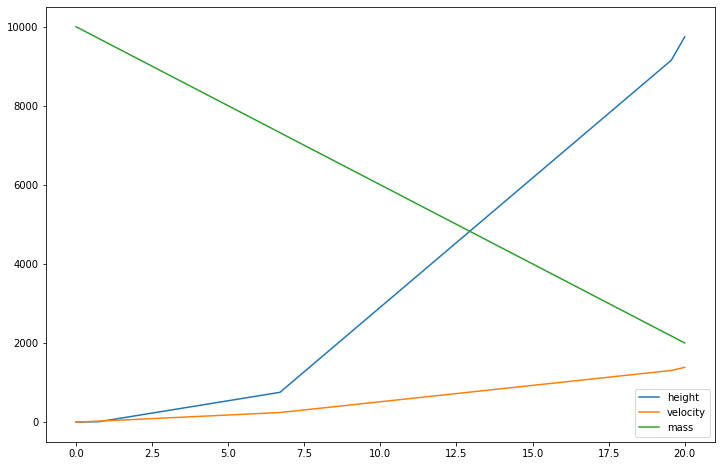

In [15]:
main()